### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import scipy.stats as stats

### Funções

In [2]:
# Muda os nomes das colunas
def column_names(df):
    df.columns = df.columns.str.replace('%', '_PCT', regex=False)
    df.columns = df.columns.str.replace('/', '_', regex=False)
    return df



In [3]:
# Criar dummy na coluna W_L
# Substituir 'W' por 1 e 'L' por 0
def dummy_win_lose(df):
    df['W_L'] = df['W_L'].map({'W': 1, 'L': 0})
    return df


In [4]:
# Função para determinar se o jogo é em casa ou fora
def add_home_away_column(df):
    df['HOME_AWAY'] = df['MATCH'].apply(lambda x: 'home' if 'vs.' in x else 'away' if '@' in x else None)
    return df

In [5]:
# Inverte as linhas do dataset
def invert_rows(df):
    return df.iloc[::-1].reset_index(drop=True)


## Temporada Regular

### Dataset

In [6]:
warriors_14_15 = pd.read_excel('dataset_teams/regular_season/warriors_2014_2015.xlsx')
warriors_15_16 = pd.read_excel('dataset_teams/regular_season/warriors_2015_2016.xlsx')
warriors_16_17 = pd.read_excel('dataset_teams/regular_season/warriors_2016_2017.xlsx')
warriors_17_18 = pd.read_excel('dataset_teams/regular_season/warriors_2017_2018.xlsx')
warriors_18_19 = pd.read_excel('dataset_teams/regular_season/warriors_2018_2019.xlsx')
warriors_21_22 = pd.read_excel('dataset_teams/regular_season/warriors_2021_2022.xlsx')

In [7]:
# Modificando nome das colunas
warriors_14_15 = column_names(warriors_14_15)
warriors_15_16 = column_names(warriors_15_16)
warriors_16_17 = column_names(warriors_16_17)
warriors_17_18 = column_names(warriors_17_18)
warriors_18_19 = column_names(warriors_18_19)
warriors_21_22 = column_names(warriors_21_22)

In [8]:
# Aplicar a função a cada dataframe
warriors_14_15 = dummy_win_lose(warriors_14_15)
warriors_15_16 = dummy_win_lose(warriors_15_16)
warriors_16_17 = dummy_win_lose(warriors_16_17)
warriors_17_18 = dummy_win_lose(warriors_17_18)
warriors_18_19 = dummy_win_lose(warriors_18_19)
warriors_21_22 = dummy_win_lose(warriors_21_22)

In [9]:
warriors_14_15 = add_home_away_column(warriors_14_15)
warriors_15_16 = add_home_away_column(warriors_15_16)
warriors_16_17 = add_home_away_column(warriors_16_17)
warriors_17_18 = add_home_away_column(warriors_17_18)
warriors_18_19 = add_home_away_column(warriors_18_19)
warriors_21_22 = add_home_away_column(warriors_21_22)

In [10]:
warriors_14_15 = invert_rows(warriors_14_15)
warriors_15_16 = invert_rows(warriors_15_16)
warriors_16_17 = invert_rows(warriors_16_17)
warriors_17_18 = invert_rows(warriors_17_18)
warriors_18_19 = invert_rows(warriors_18_19)
warriors_21_22 = invert_rows(warriors_21_22)

In [11]:
# Concatenar os datasets
warriors_merged = pd.concat([
    warriors_14_15,
    warriors_15_16,
    warriors_16_17,
    warriors_17_18,
    warriors_18_19,
    warriors_21_22
], ignore_index=True)


In [12]:
print(warriors_15_16.shape)
print(warriors_merged.shape)

(82, 24)
(492, 24)


### Data Visualization

In [13]:
datasets = [
    (warriors_14_15, '2014-2015'),
    (warriors_15_16, '2015-2016'),
    (warriors_16_17, '2016-2017'),
    (warriors_17_18, '2017-2018'),
    (warriors_18_19, '2018-2019'),
    (warriors_21_22, '2021-2022')
]

datasets_2 = [
    (warriors_14_15, '2014-2015'),
    (warriors_15_16, '2015-2016'),
    (warriors_16_17, '2016-2017'),
    (warriors_17_18, '2017-2018'),
    (warriors_18_19, '2018-2019'),
    (warriors_21_22, '2021-2022'),
    (warriors_merged, 'Total')
]

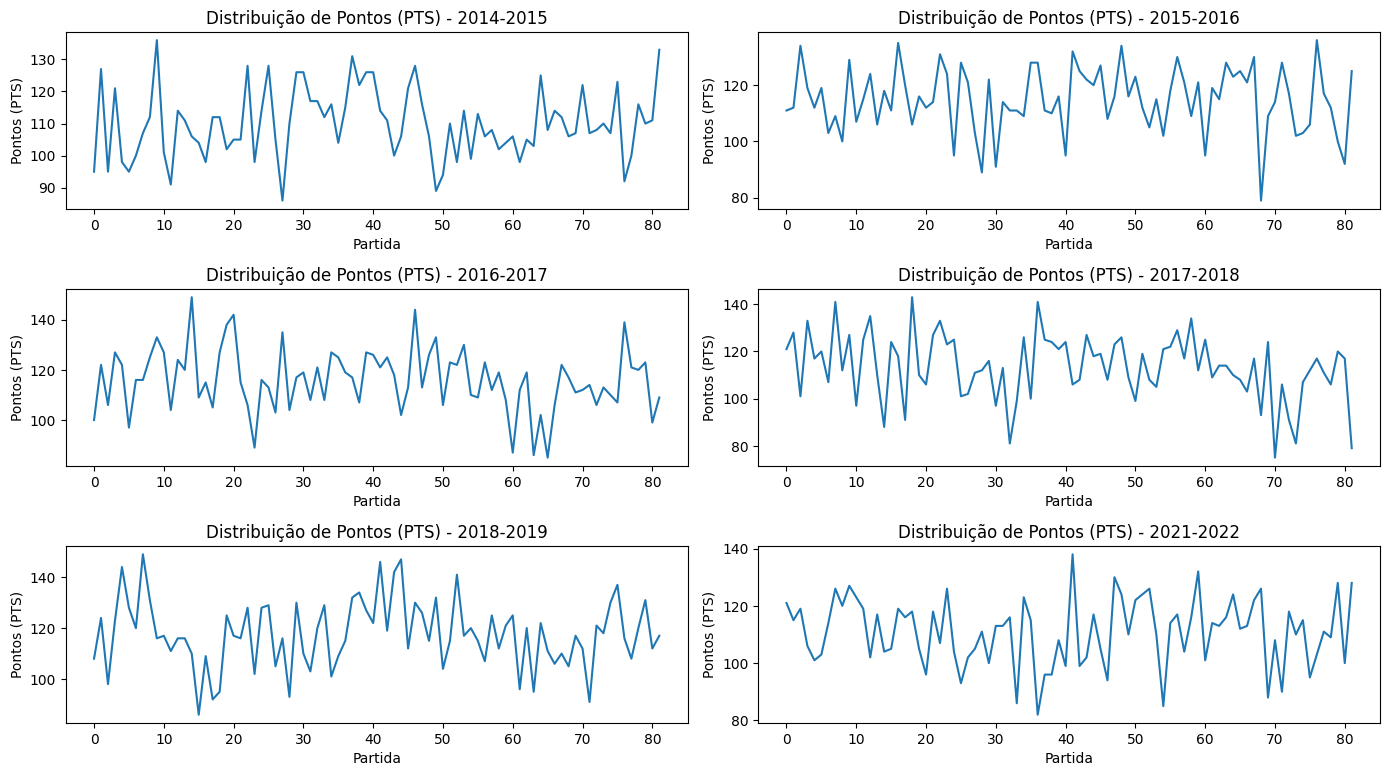

In [14]:
# Distribuição de pontos ao longo de cada temporada
plt.figure(figsize=(14, 10))
for i, (df, title) in enumerate(datasets, 1):
    plt.subplot(4, 2, i)
    sns.lineplot(x=df.index, y=df['PTS'])
    plt.title(f'Distribuição de Pontos (PTS) - {title}')
    plt.xlabel('Partida')
    plt.ylabel('Pontos (PTS)')
    plt.tight_layout()

plt.show()

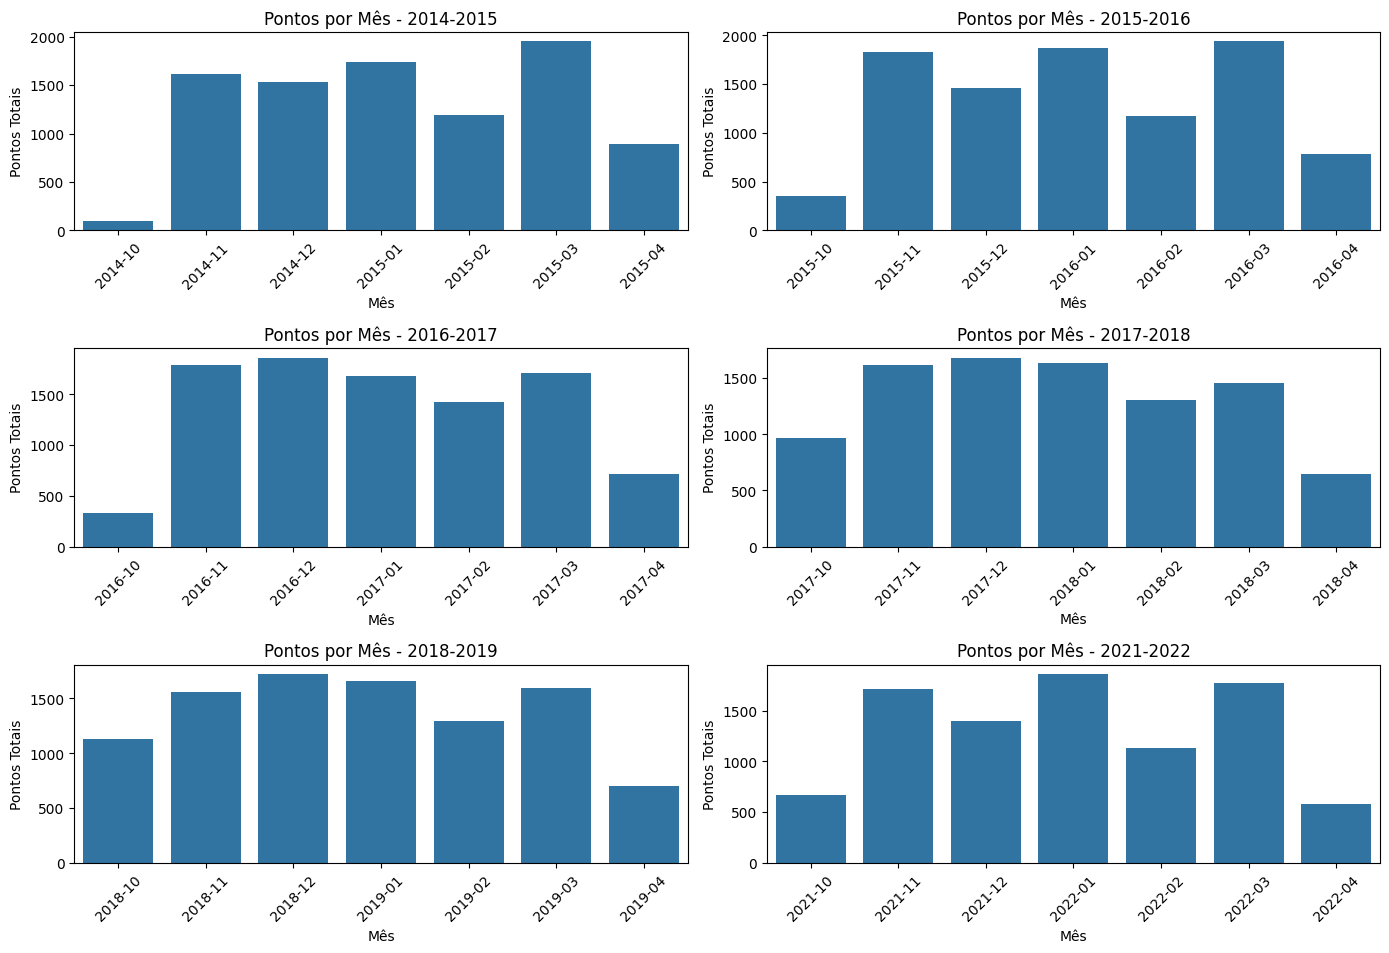

In [15]:
# Quantidade de pontos feitos por mês
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    monthly_points = df.groupby('MONTH')['PTS'].sum()

    plt.subplot(4, 2, i)
    sns.barplot(x=monthly_points.index.astype(str), y=monthly_points.values)
    plt.title(f'Pontos por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Pontos Totais')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

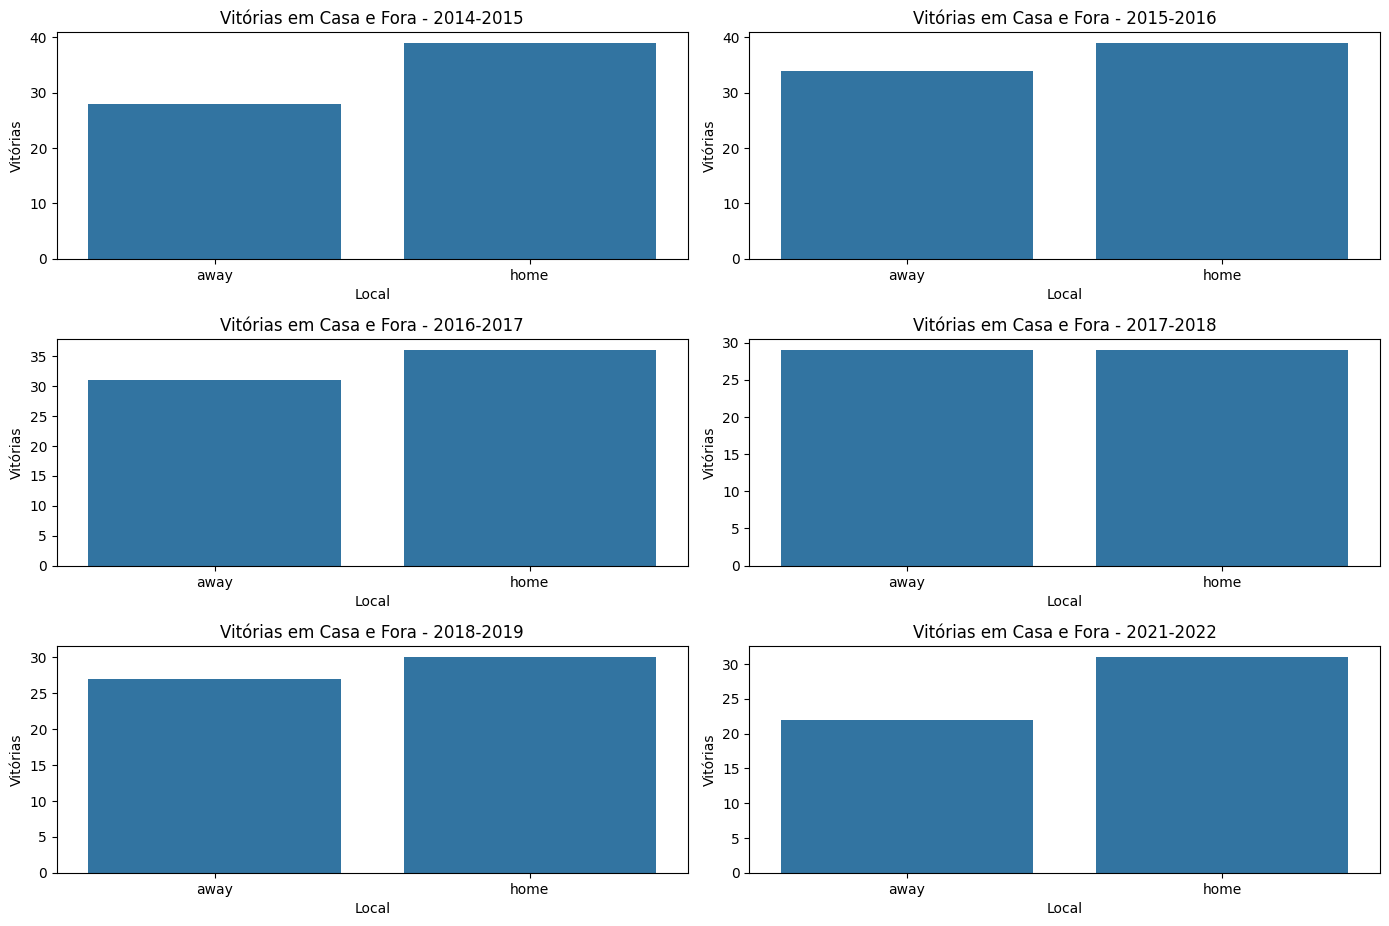

In [16]:
# Quantidade de vitórias jogando em casa e fora de casa
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets, 1):
    # Contar vitórias por local
    wins_home_away = df[df['W_L'] == 1].groupby('HOME_AWAY').size()

    plt.subplot(4, 2, i)
    sns.barplot(x=wins_home_away.index, y=wins_home_away.values)
    plt.title(f'Vitórias em Casa e Fora - {title}')
    plt.xlabel('Local')
    plt.ylabel('Vitórias')
    plt.tight_layout()

plt.show()

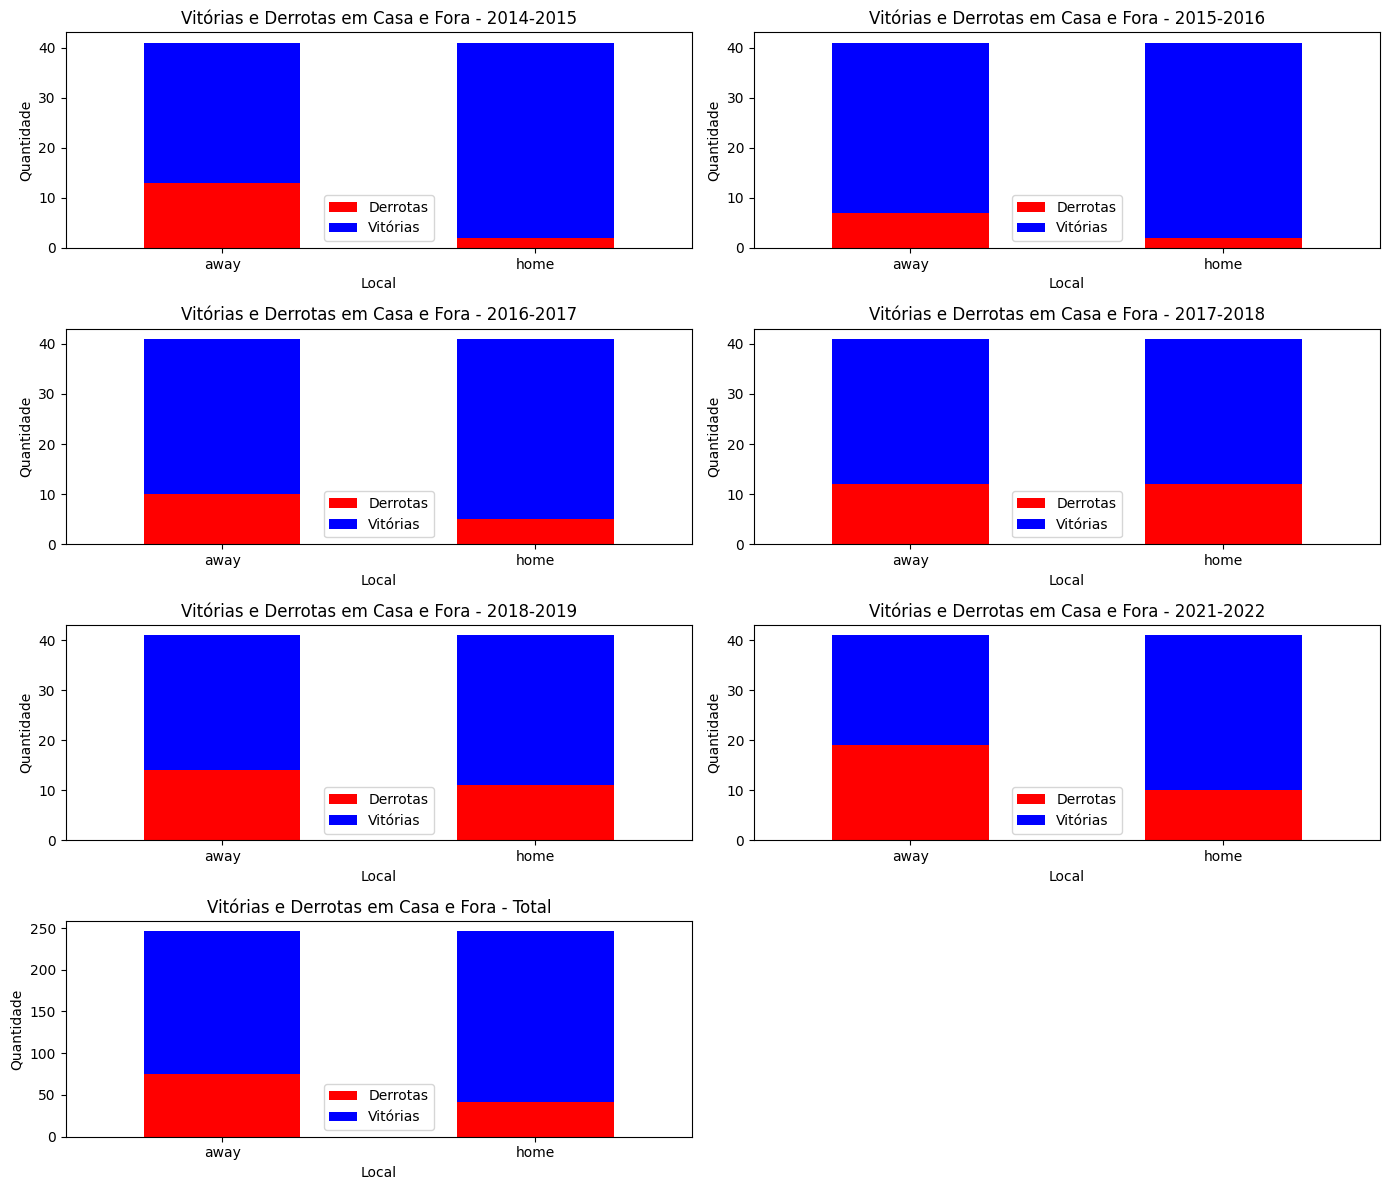

In [17]:
# Vitórias e derrotas dentro e fora de casa
plt.figure(figsize=(14, 12))
for i, (df, title) in enumerate(datasets_2, 1):
    # Contar vitórias e derrotas por local
    results_home_away = df.groupby(['HOME_AWAY', 'W_L']).size().unstack().fillna(0)
    results_home_away.columns = ['Derrotas', 'Vitórias']

    plt.subplot(4, 2, i)
    results_home_away.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())
    plt.title(f'Vitórias e Derrotas em Casa e Fora - {title}')
    plt.xlabel('Local')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.show()

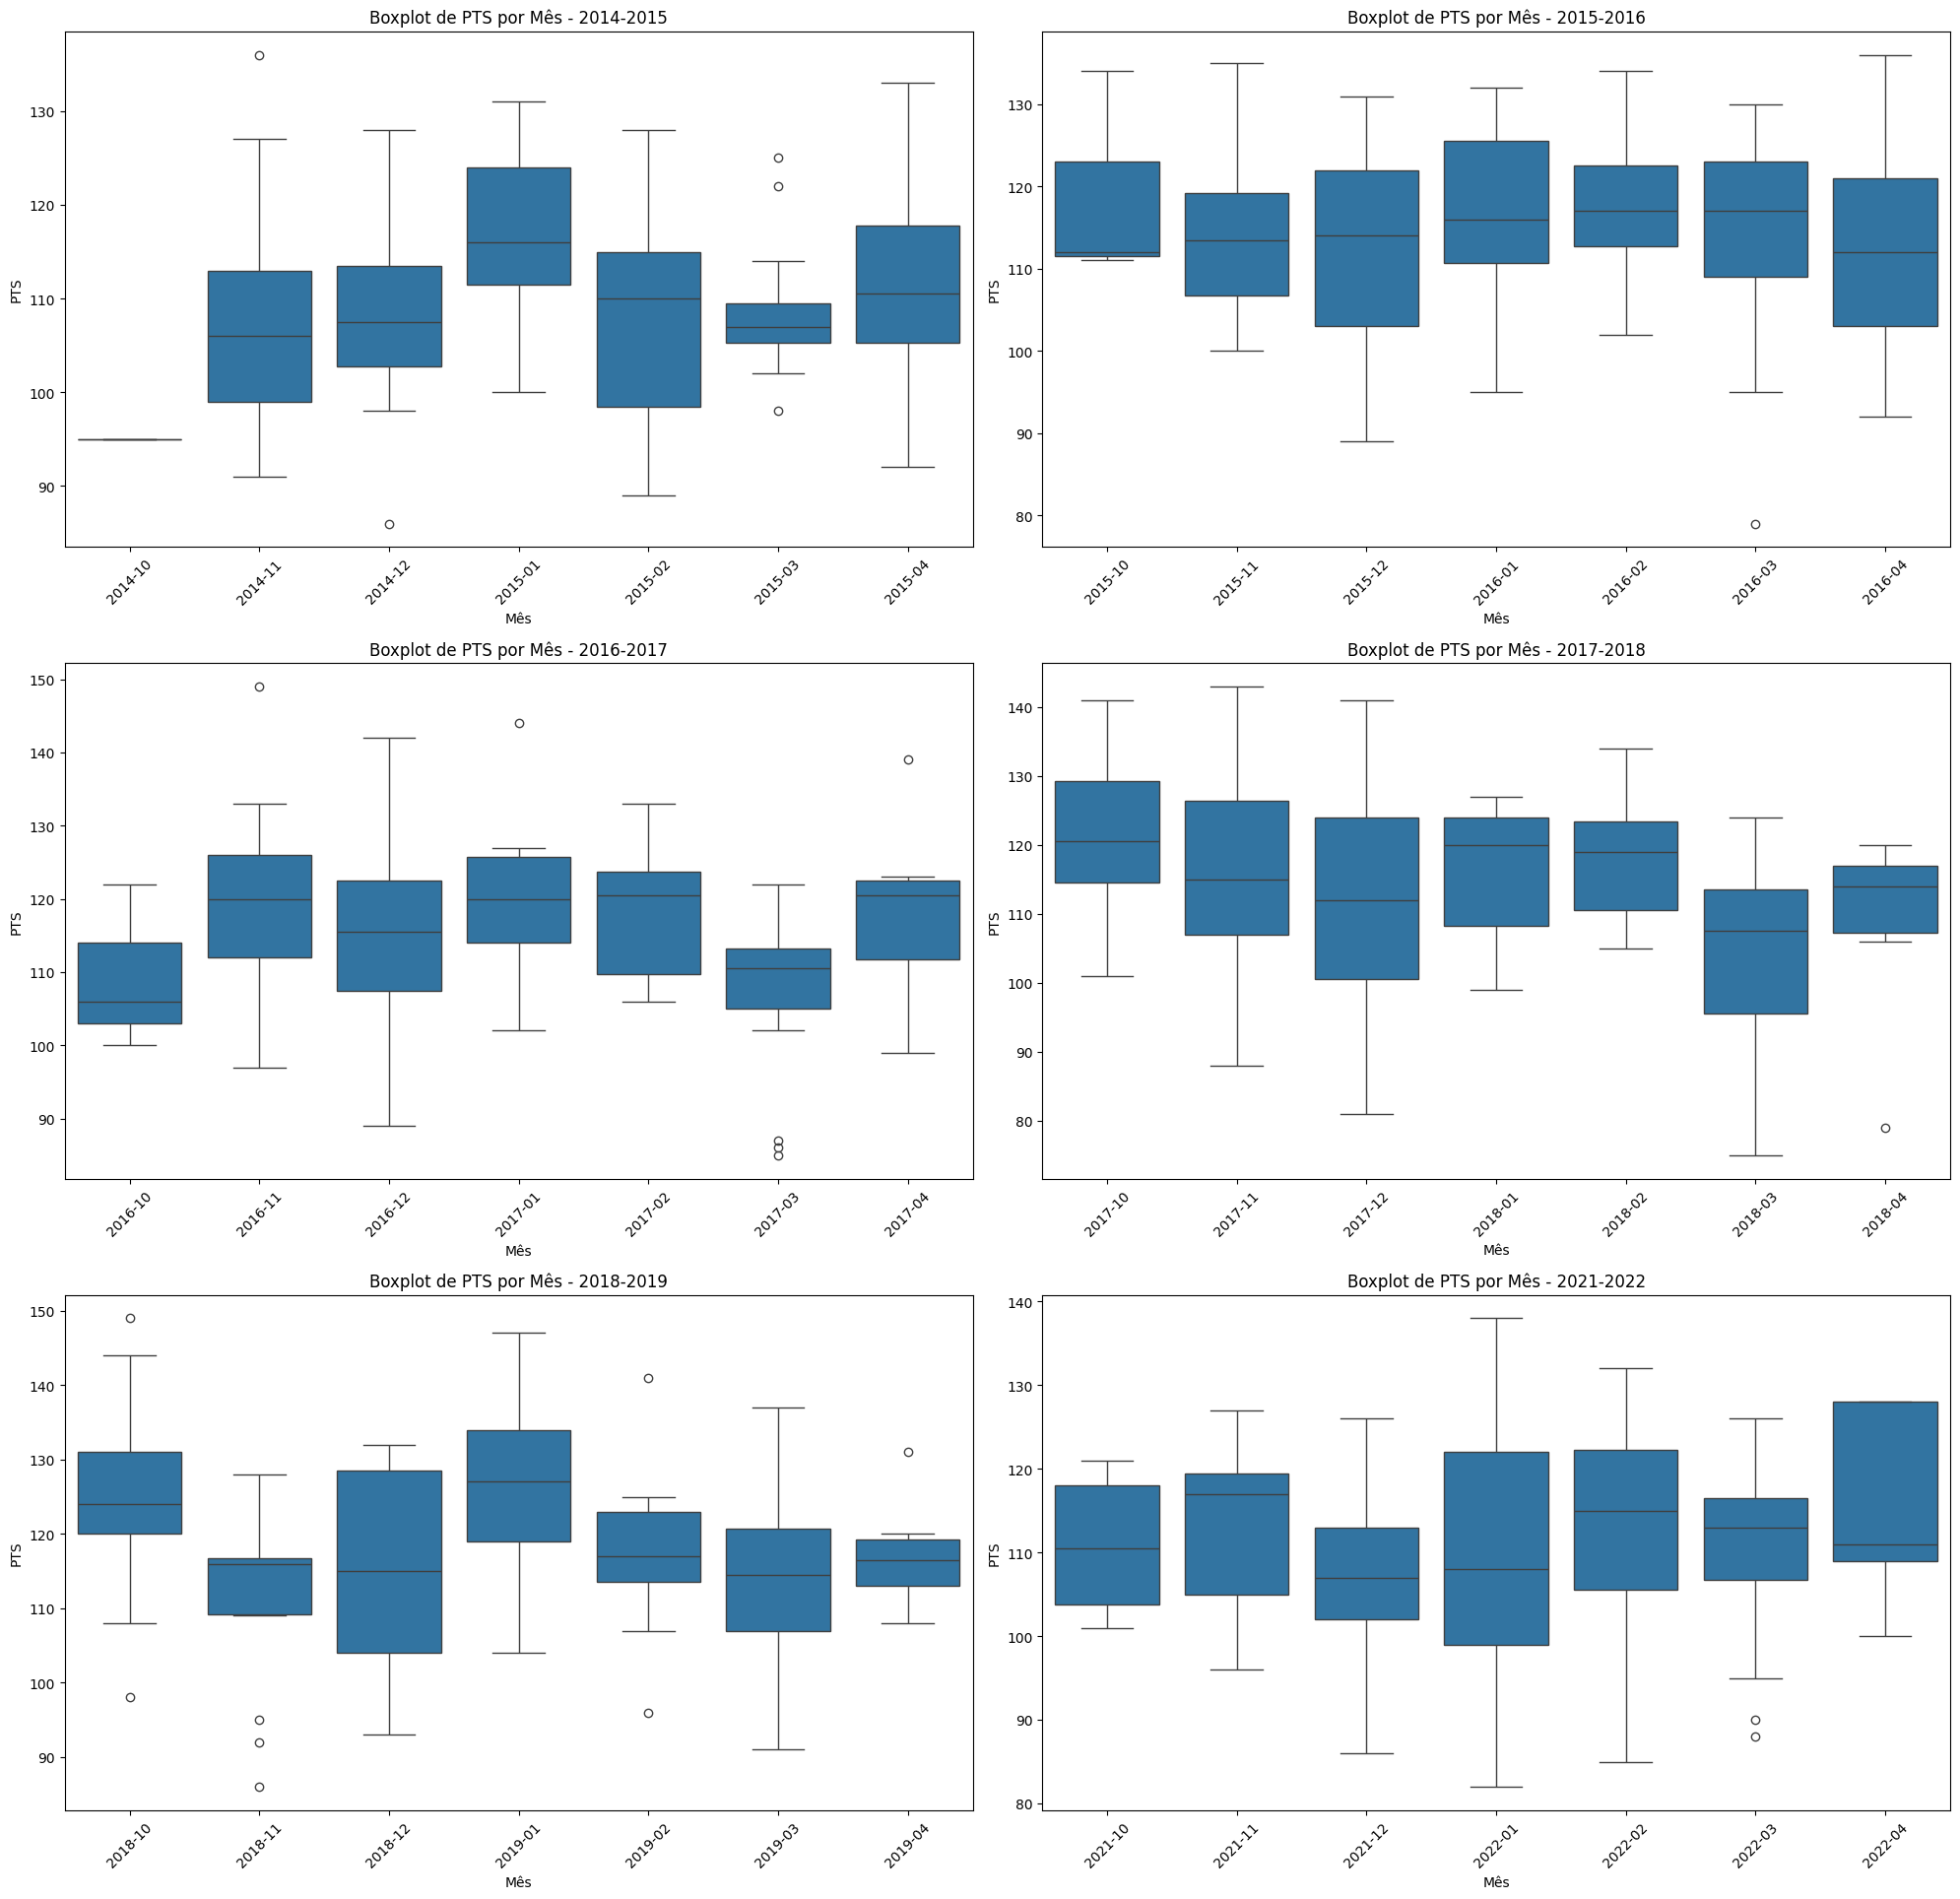

In [18]:
# Boxplot para PTS, REB, AST, STL, BLK, TOV por mês
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='MONTH', y='PTS')
    plt.title(f'Boxplot de PTS por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('PTS')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


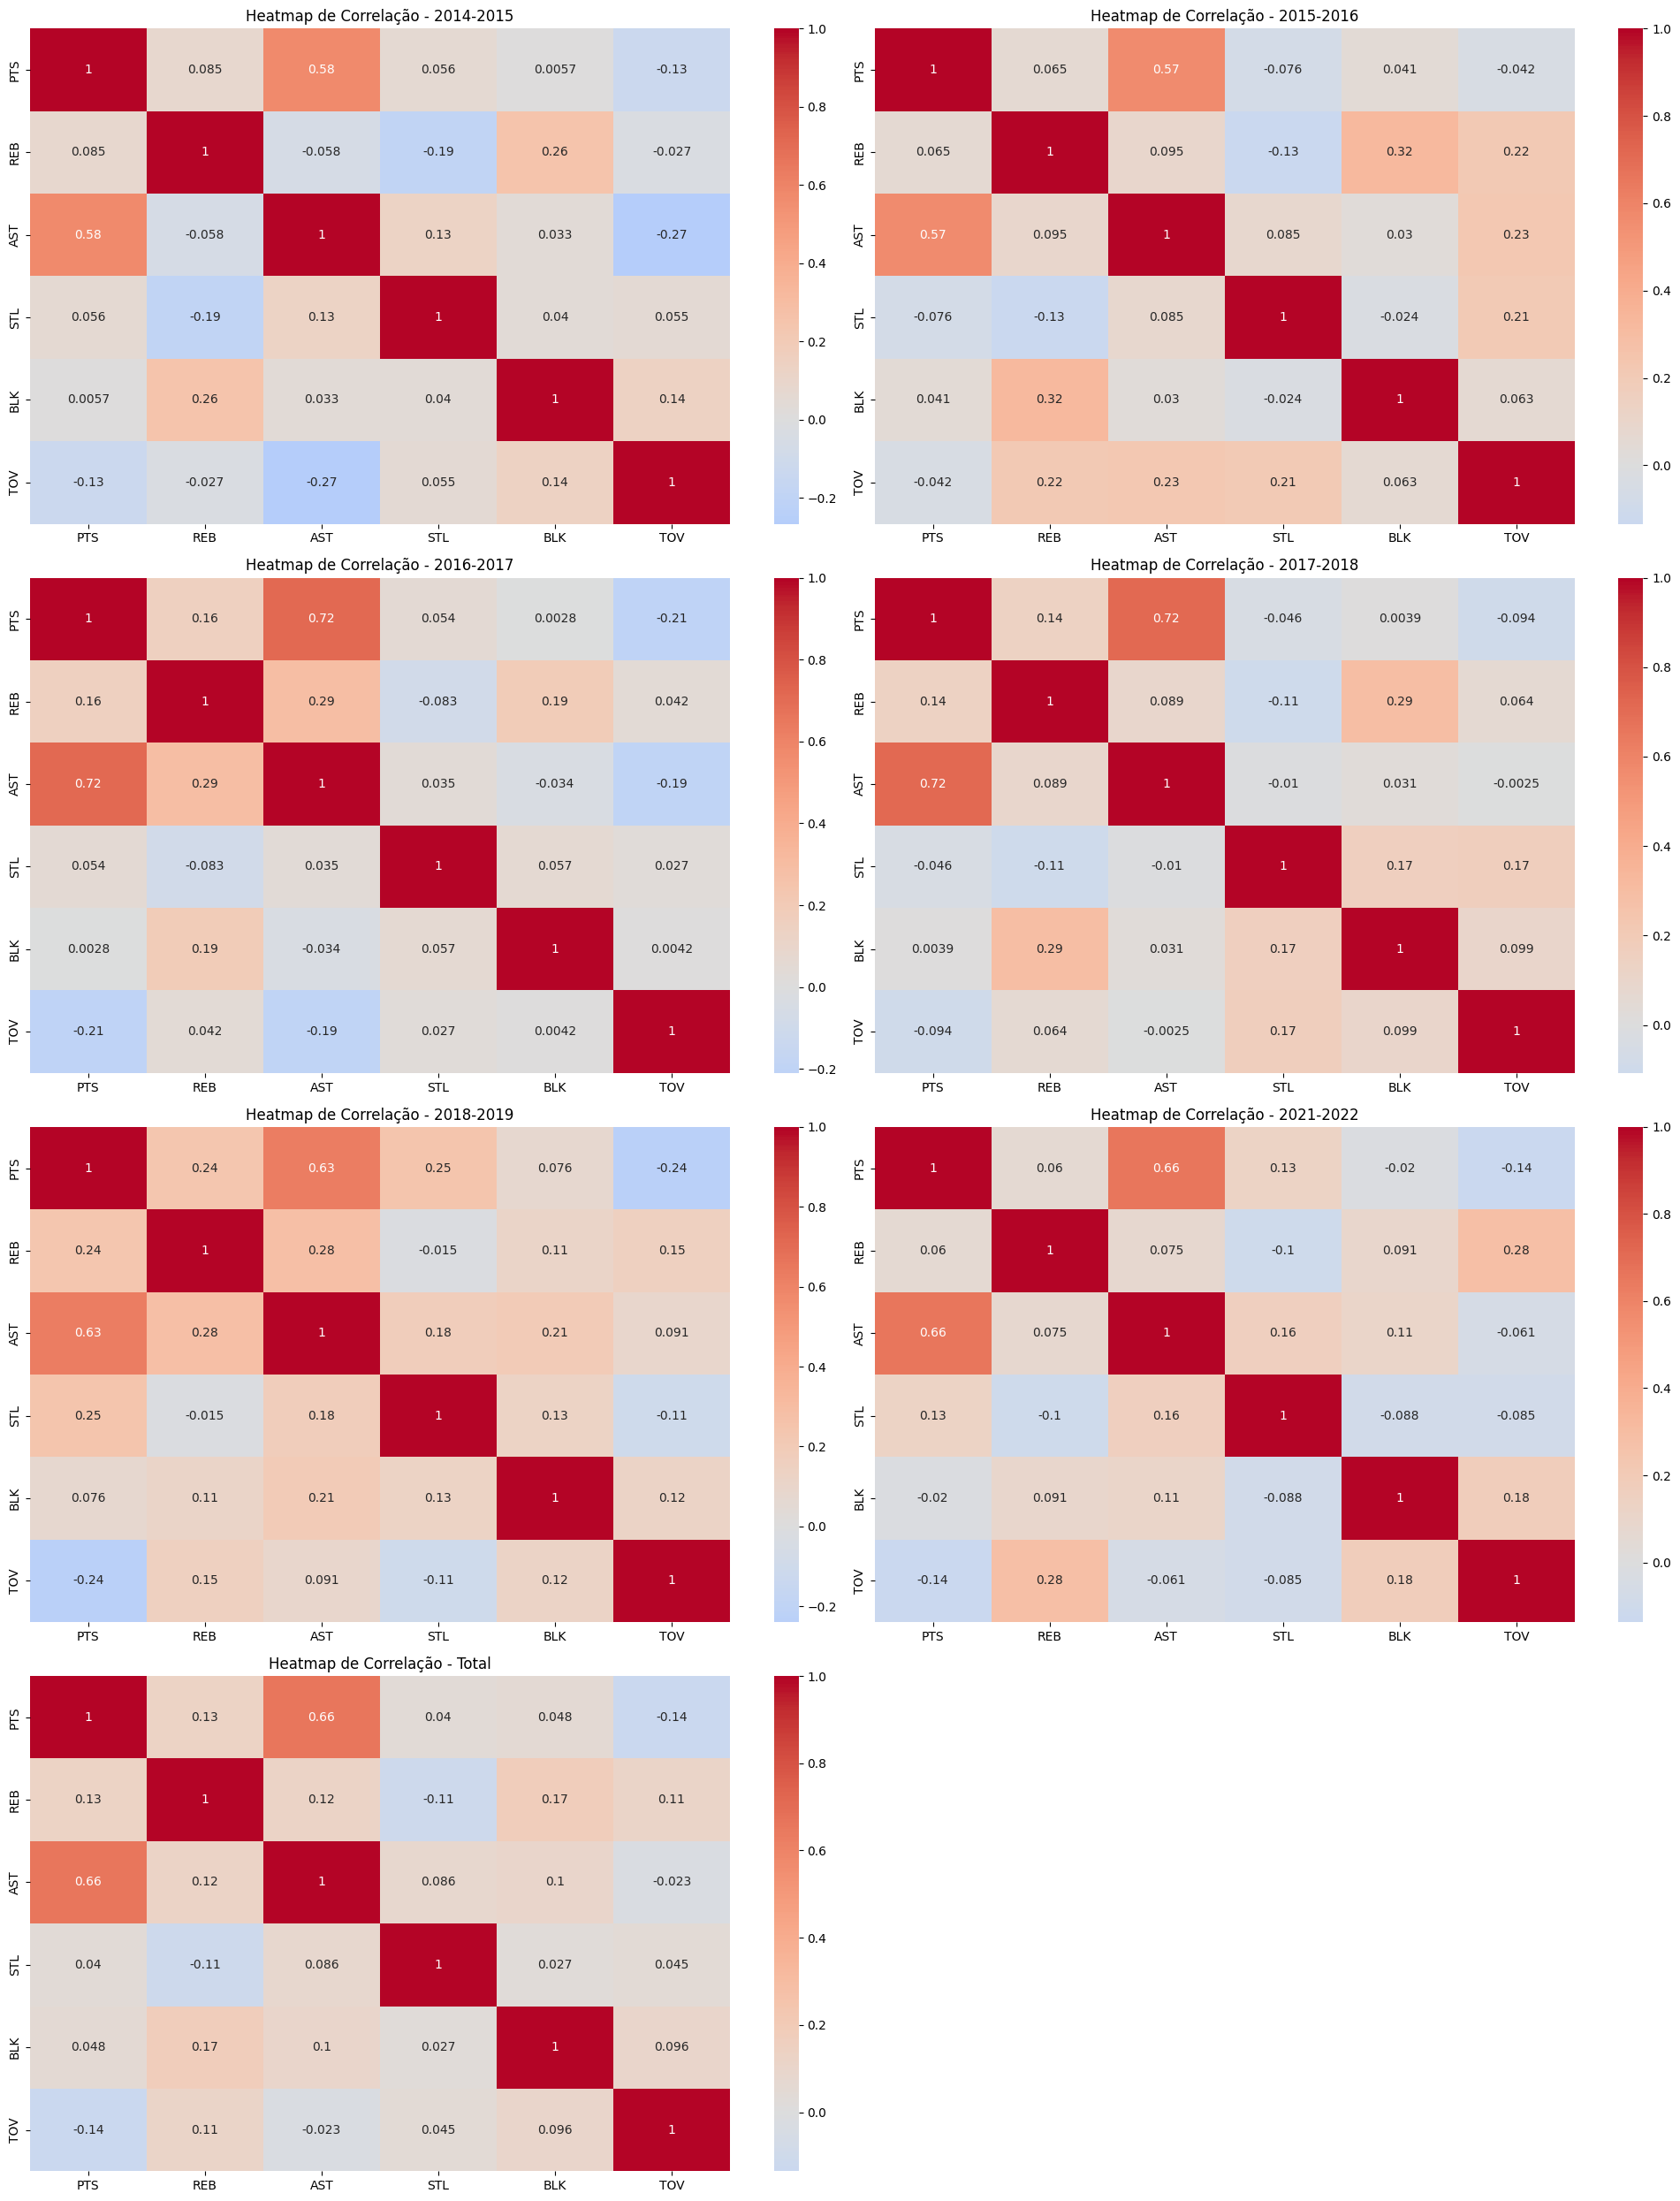

In [19]:
# Heatmap de correlação para PTS, REB, AST, STL, BLK, TOV
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    correlation = df[['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV']].corr()
    
    plt.subplot(4, 2, i)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Heatmap de Correlação - {title}')
    plt.tight_layout()

plt.show()


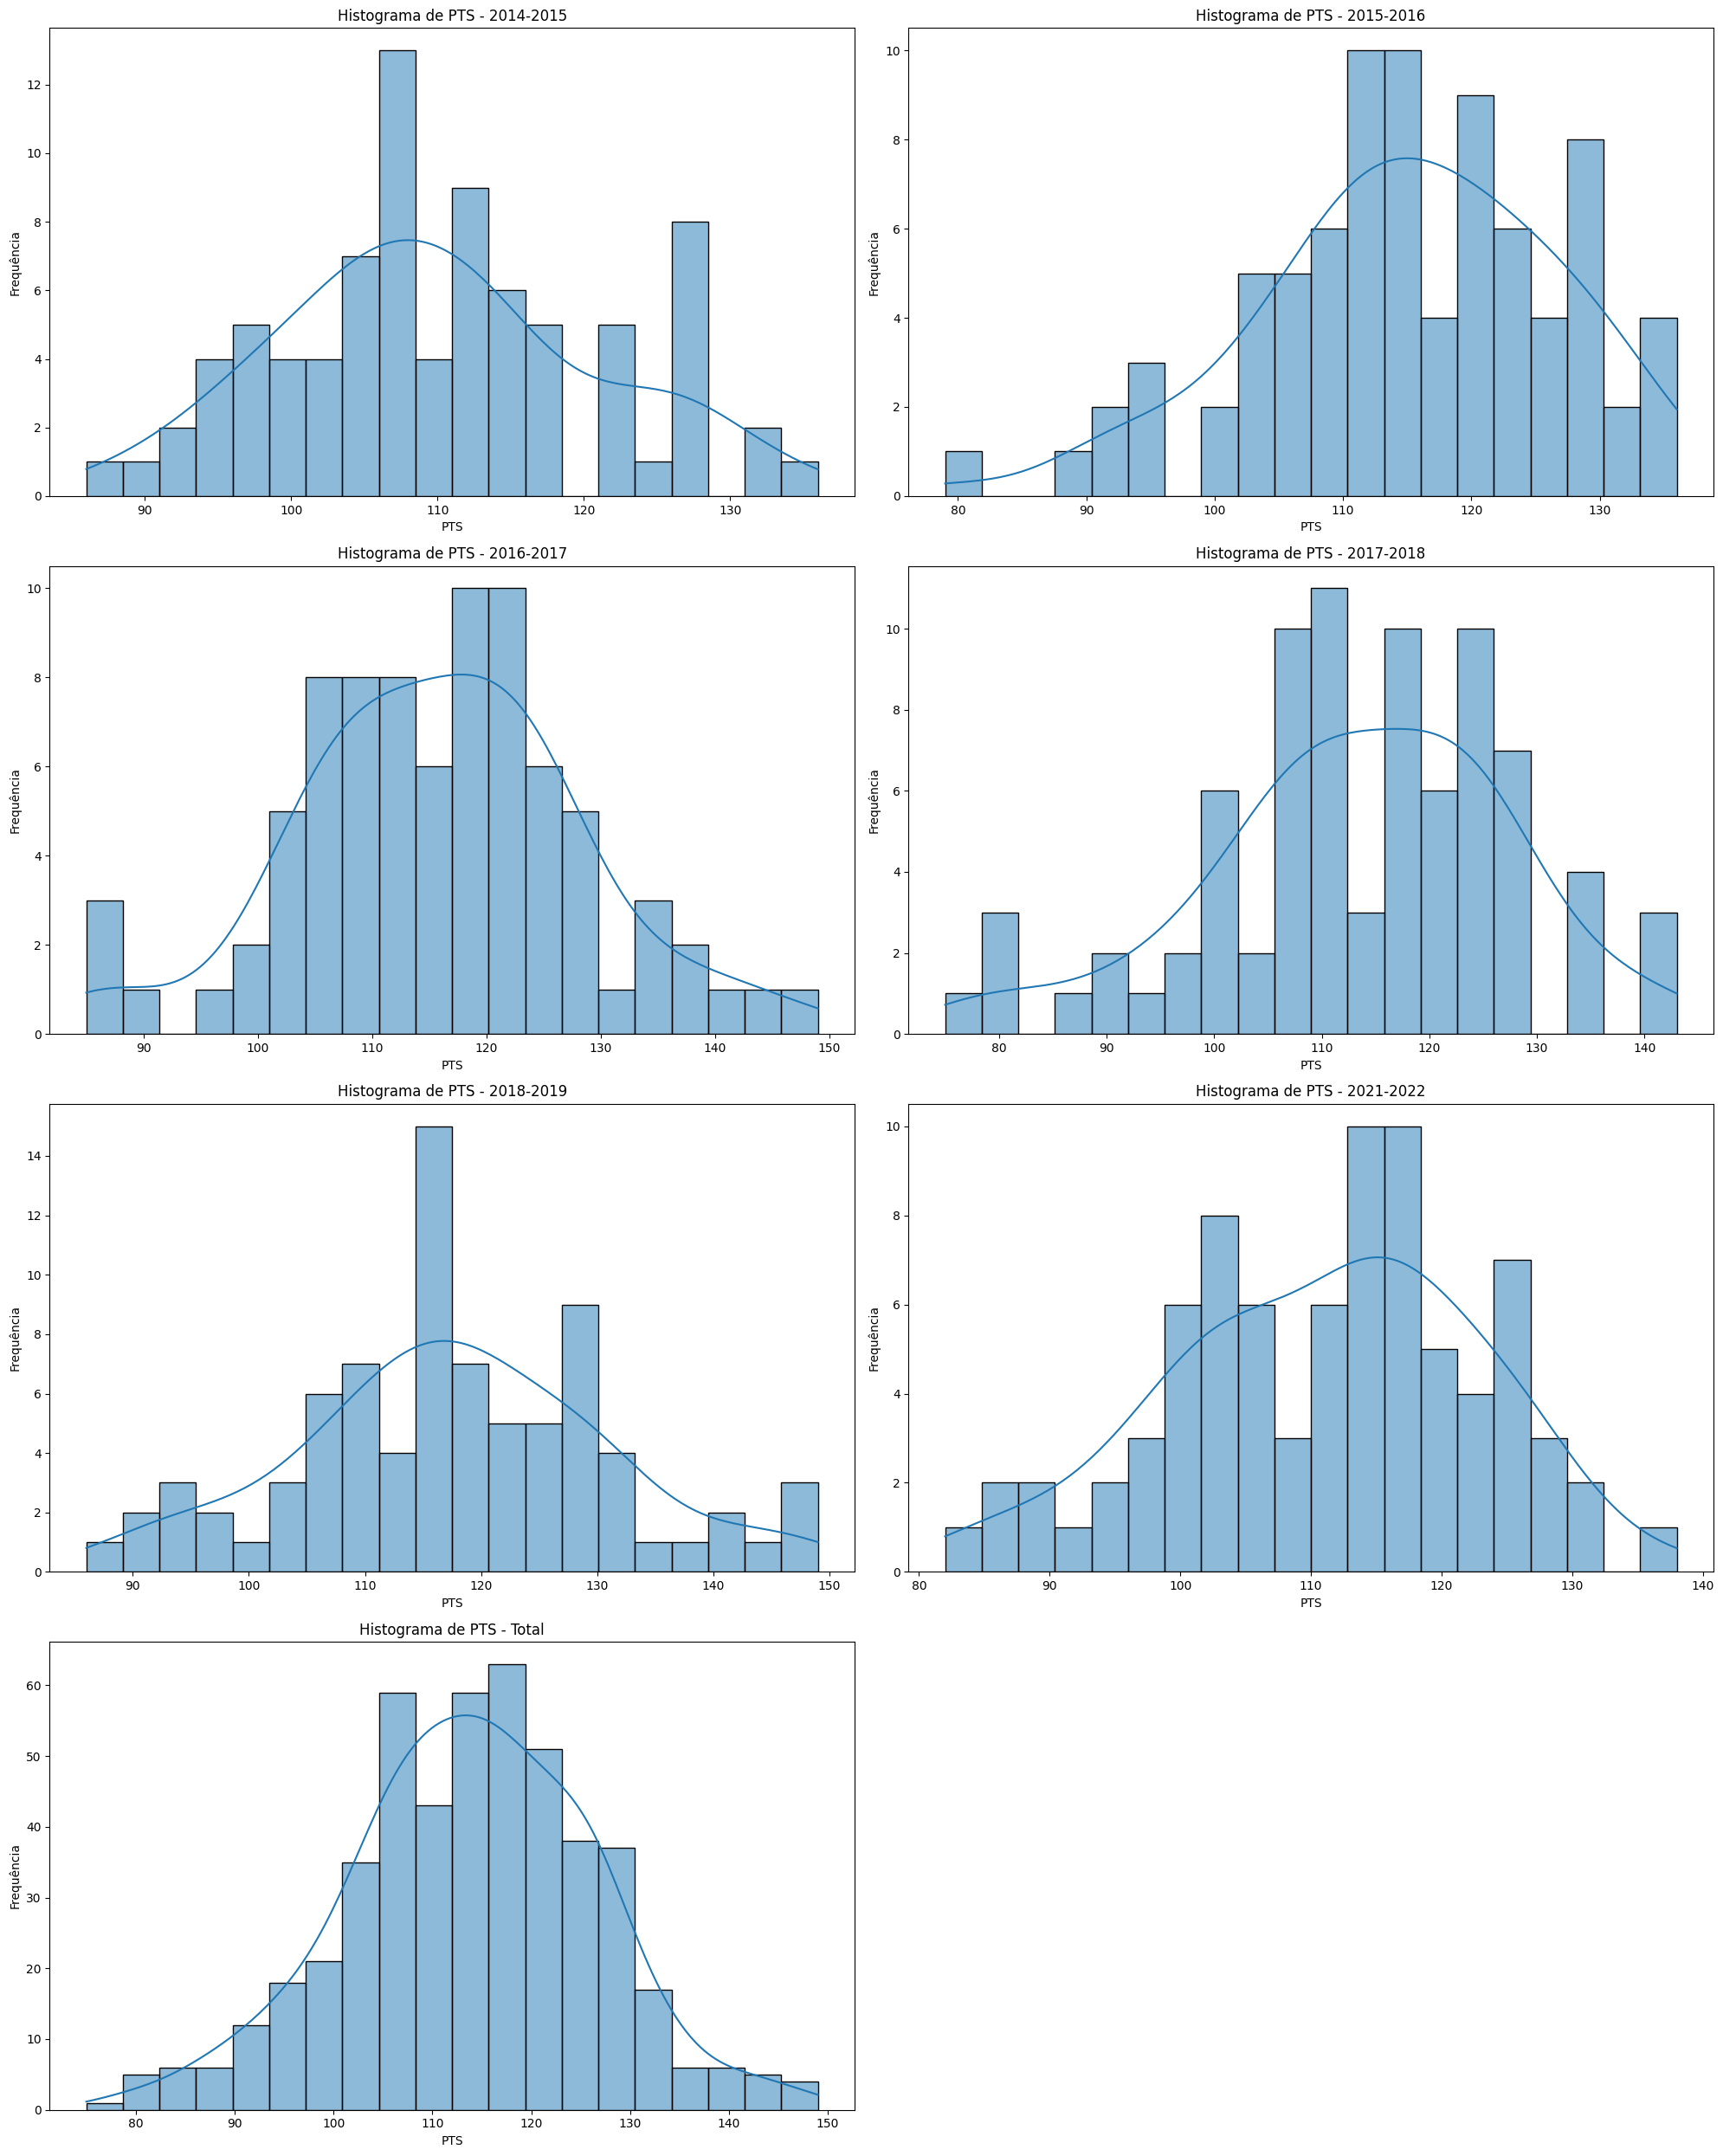

In [20]:
# Histograma da distribuição de PTS
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df['PTS'], bins=20, kde=True)
    plt.title(f'Histograma de PTS - {title}')
    plt.xlabel('PTS')
    plt.ylabel('Frequência')
    plt.tight_layout()

plt.show()


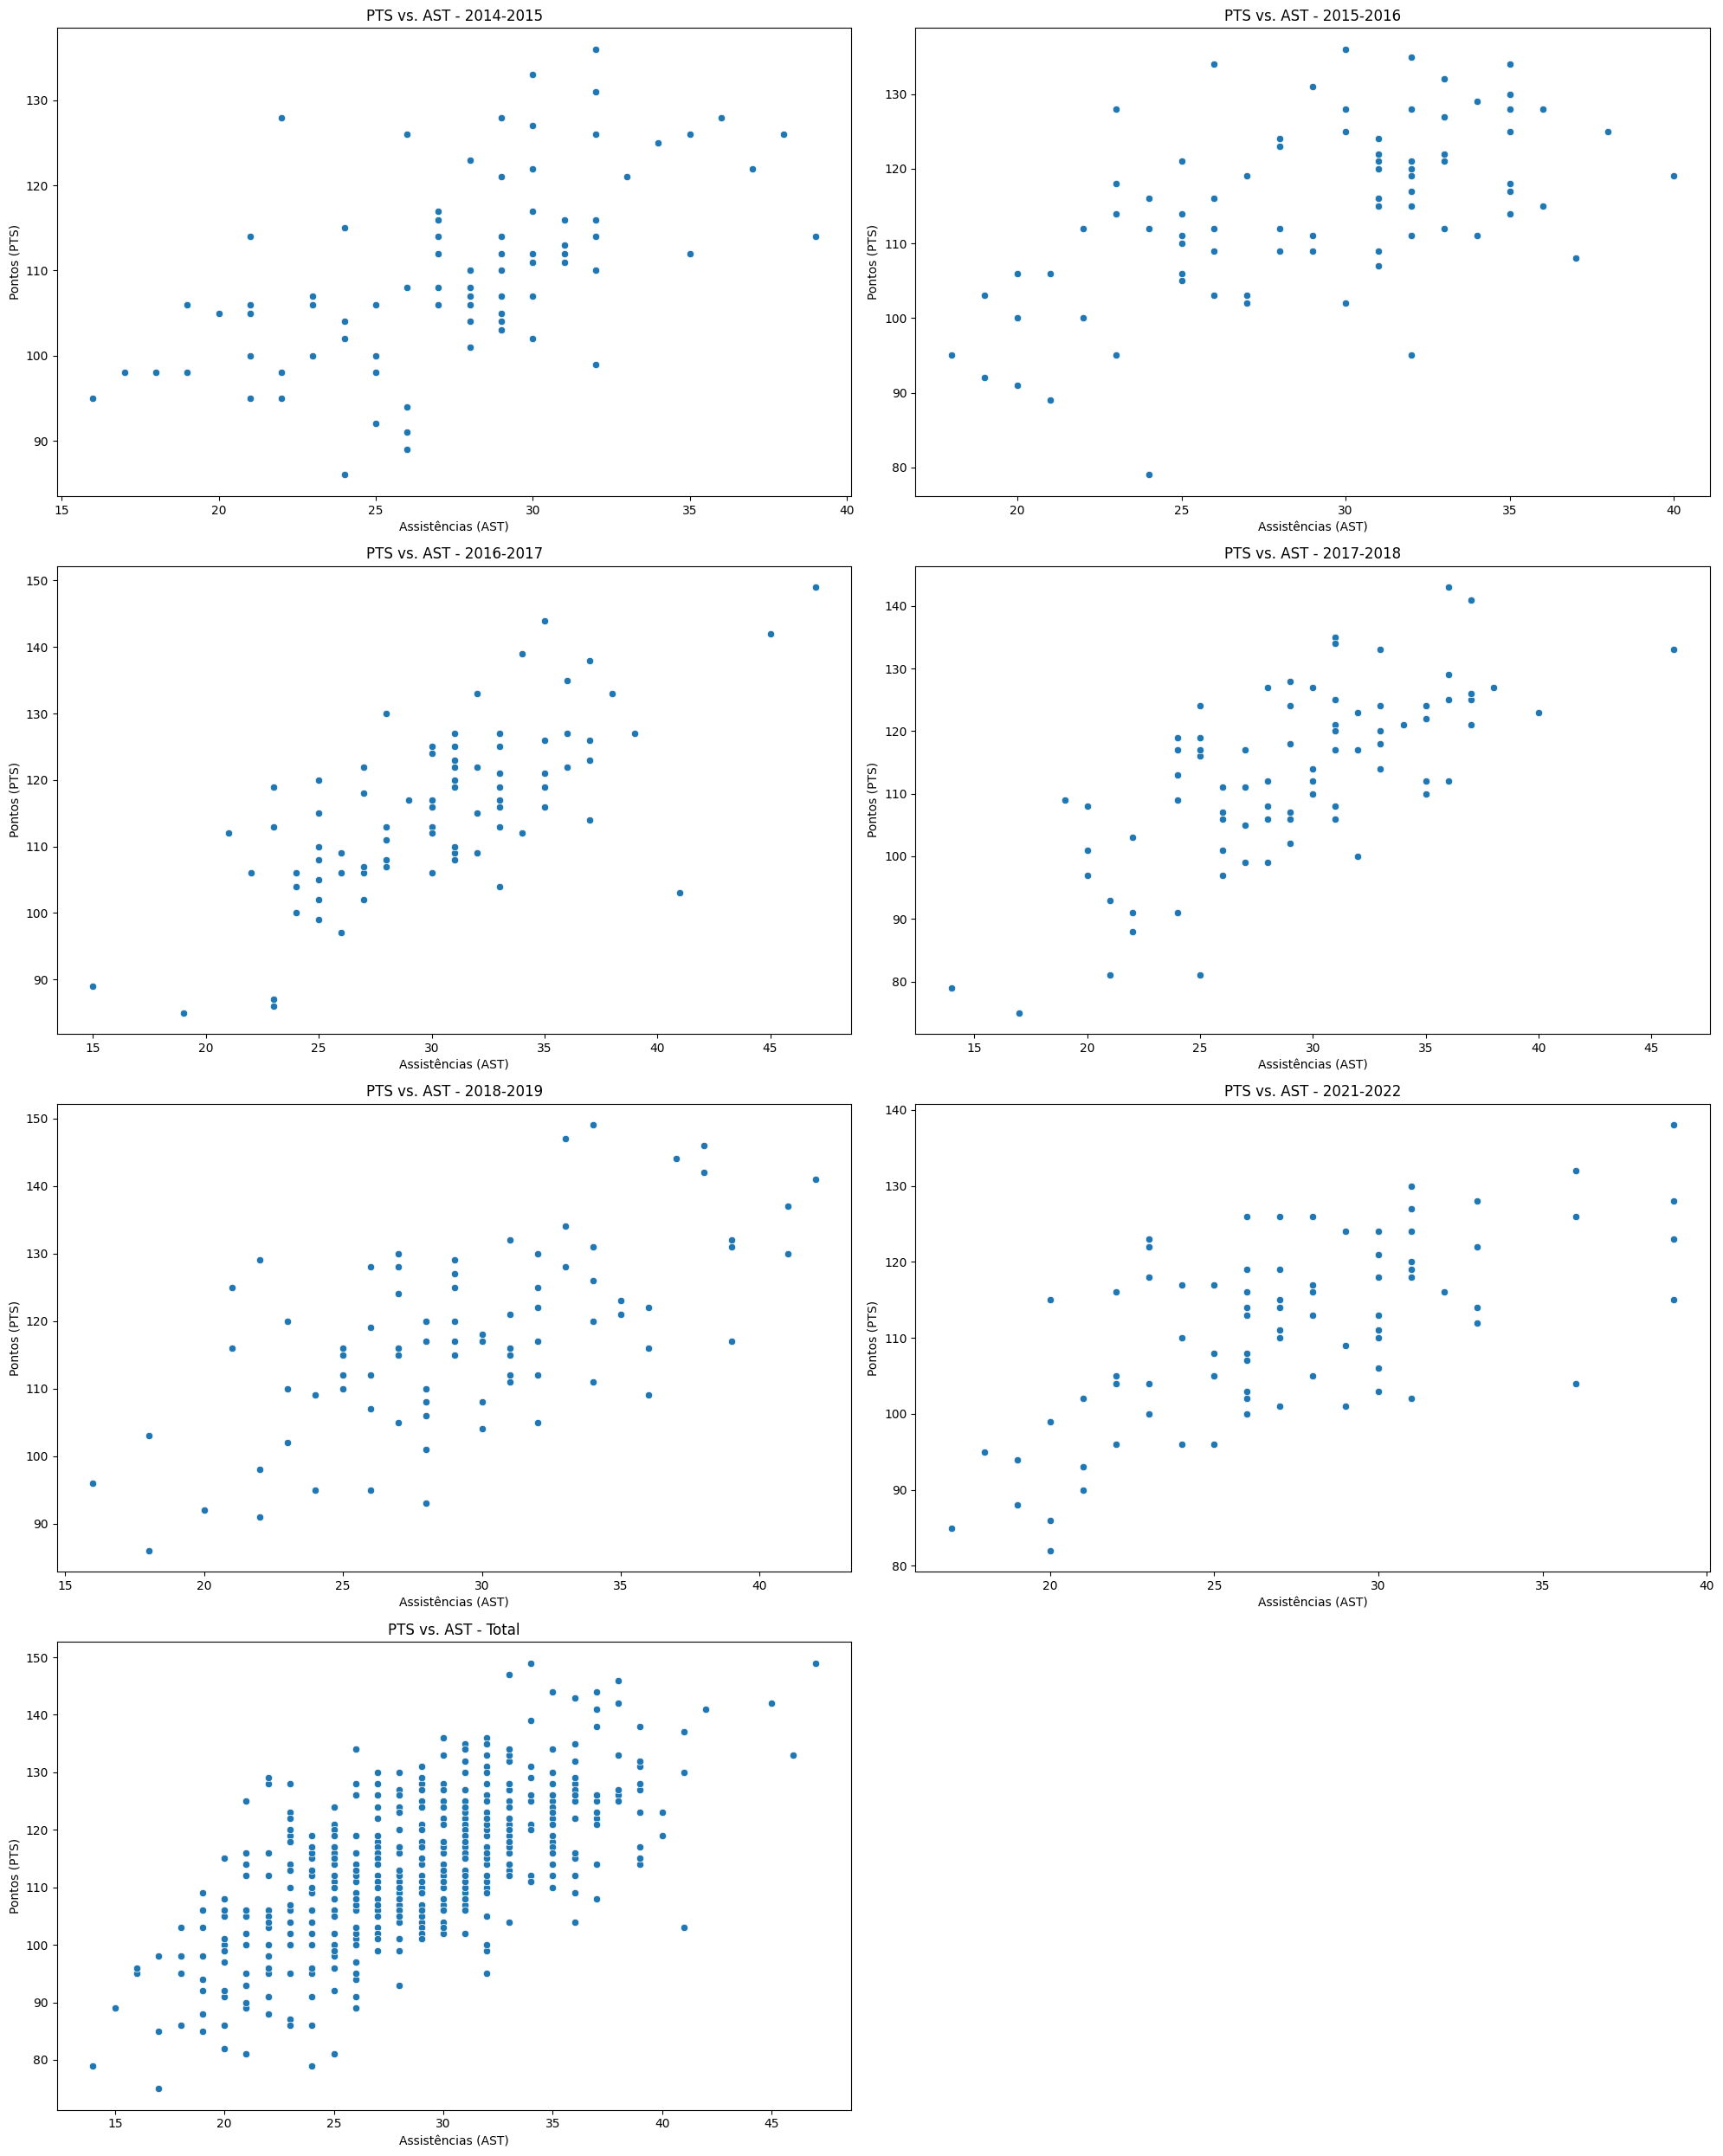

In [21]:
# Scatter plot de PTS vs. AST
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets_2, 1):
    plt.subplot(4, 2, i)
    sns.scatterplot(data=df, x='AST', y='PTS')
    plt.title(f'PTS vs. AST - {title}')
    plt.xlabel('Assistências (AST)')
    plt.ylabel('Pontos (PTS)')
    plt.tight_layout()

plt.show()


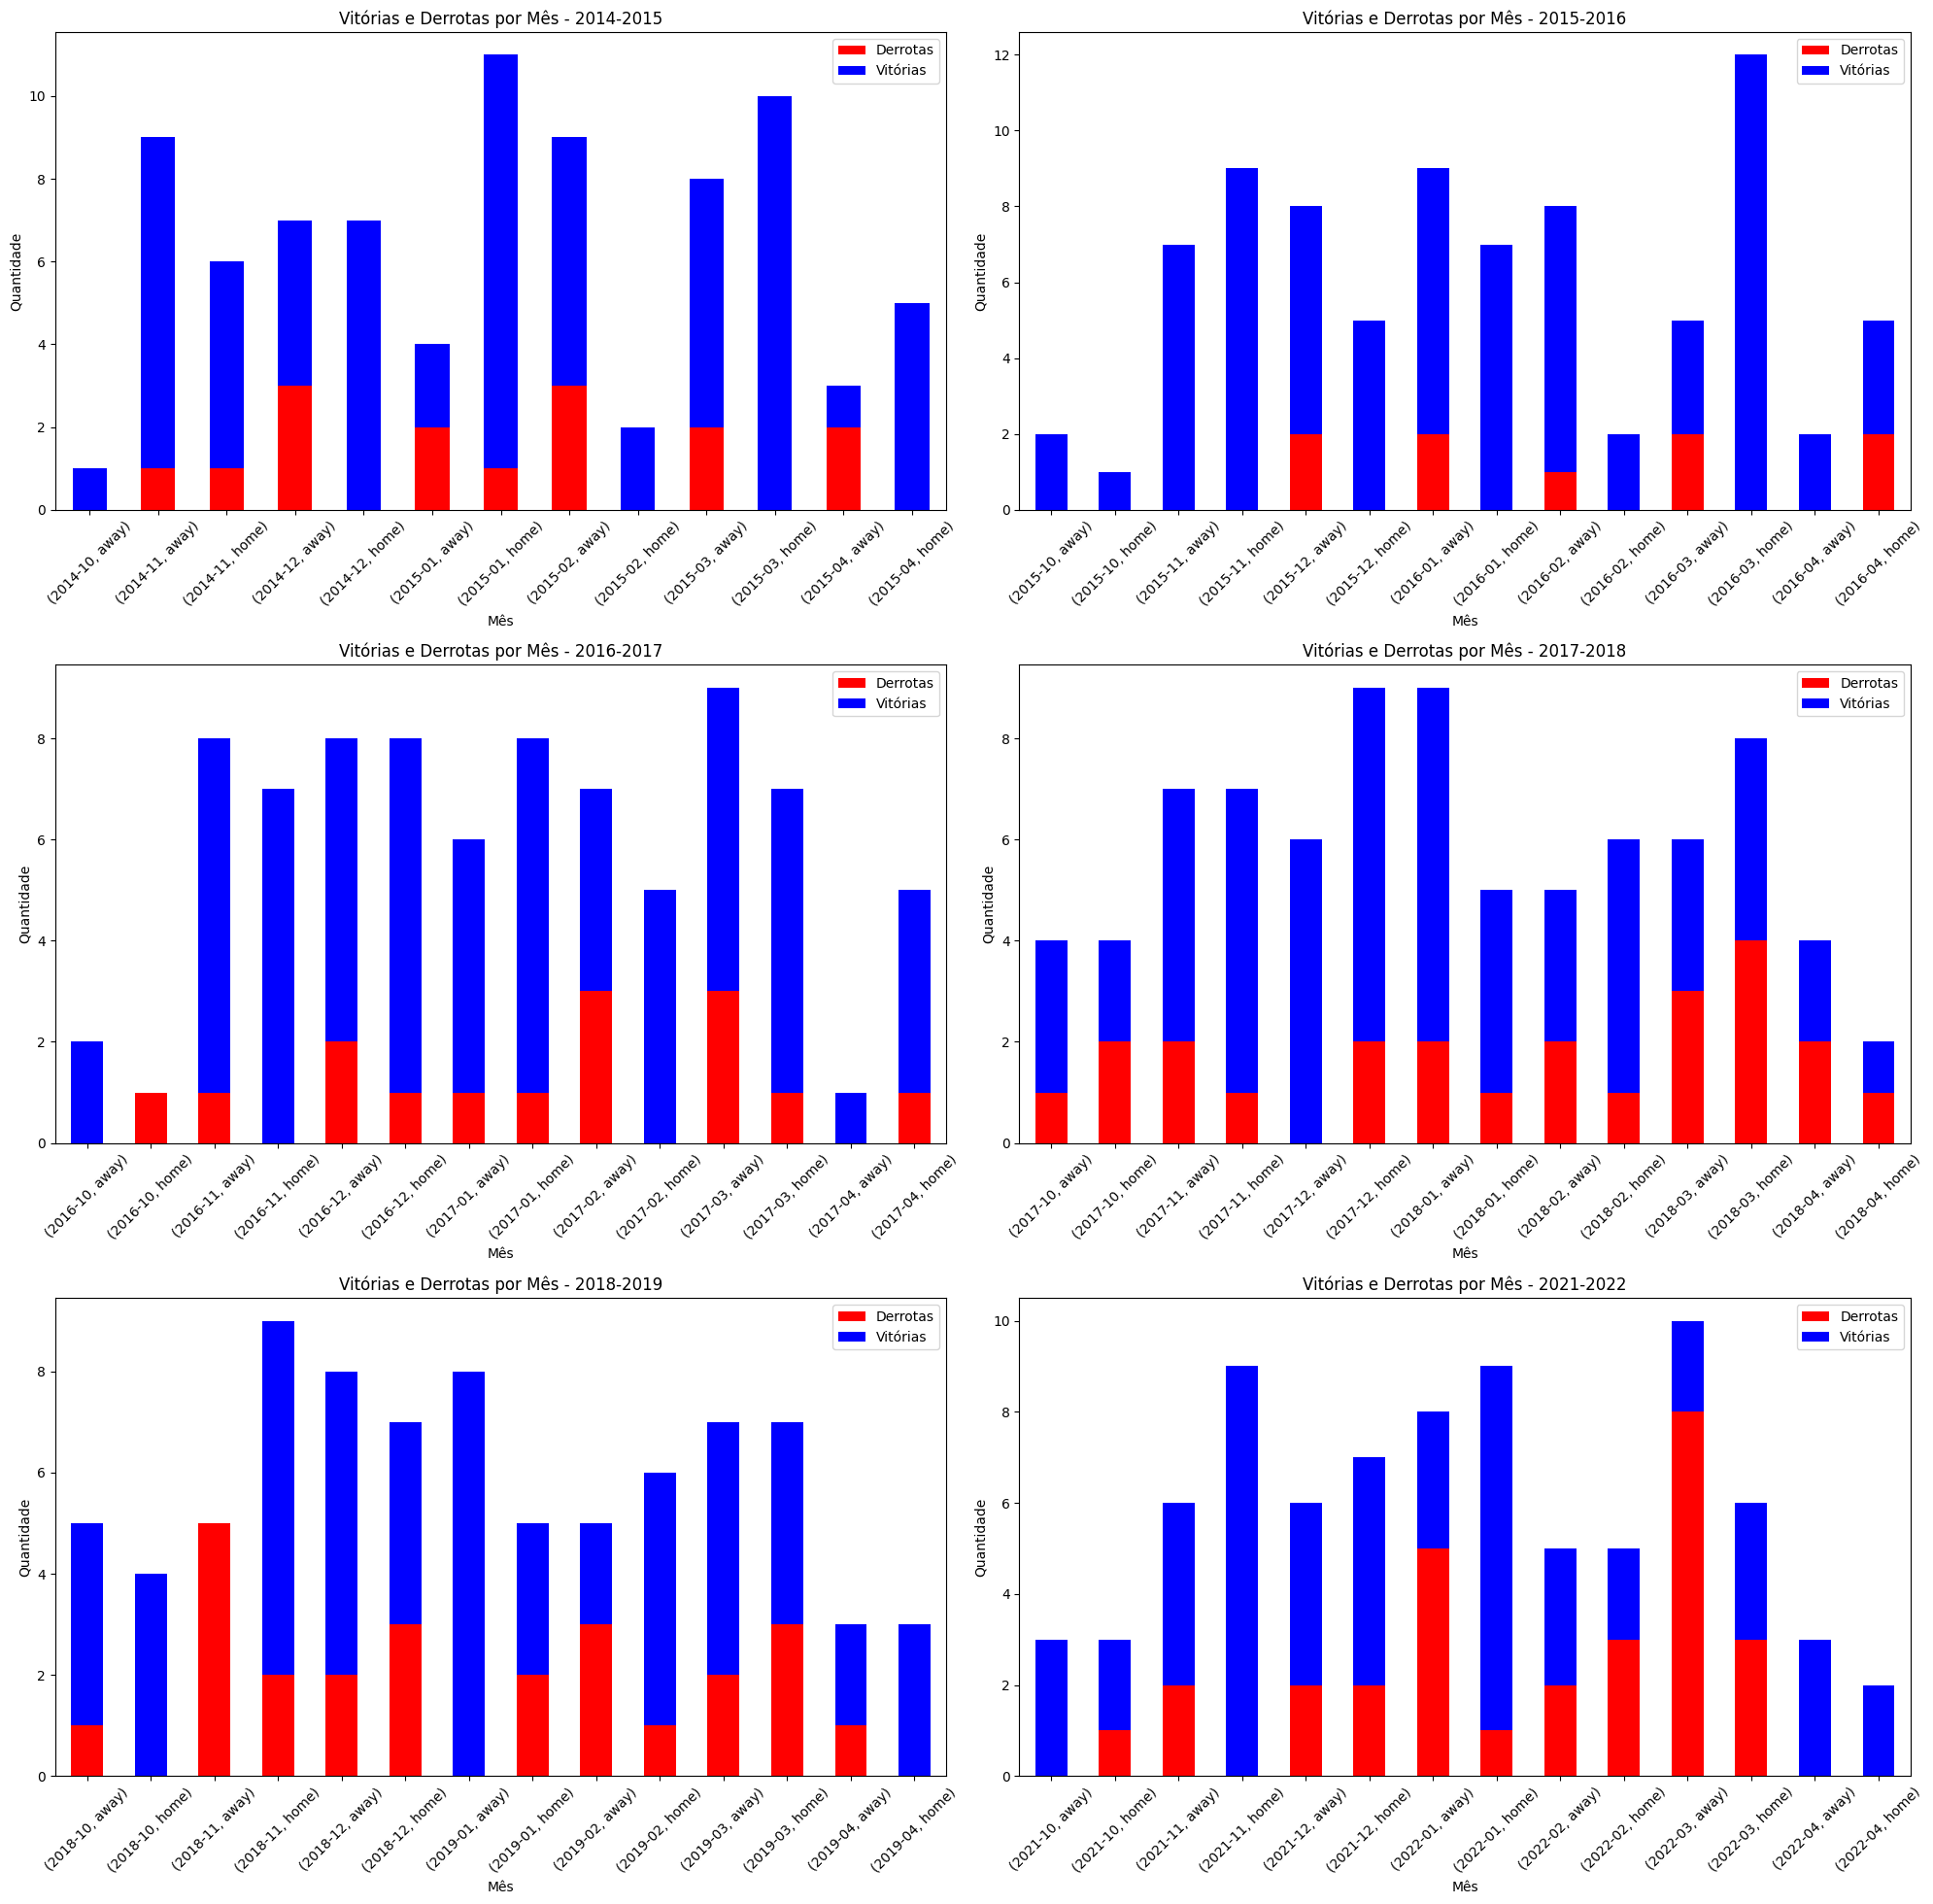

In [22]:
# Gráfico de Barras Empilhadas para vitórias e derrotas por mês
plt.figure(figsize=(20, 25))
for i, (df, title) in enumerate(datasets, 1):
    df['MONTH'] = pd.to_datetime(df['DATE']).dt.to_period('M')
    results_by_month = df.groupby(['MONTH', 'HOME_AWAY', 'W_L']).size().unstack(fill_value=0)
    results_by_month.columns = ['Derrotas', 'Vitórias']

    plt.subplot(4, 2, i)
    results_by_month.plot(kind='bar', stacked=True, color=['red', 'blue'], ax=plt.gca())
    plt.title(f'Vitórias e Derrotas por Mês - {title}')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


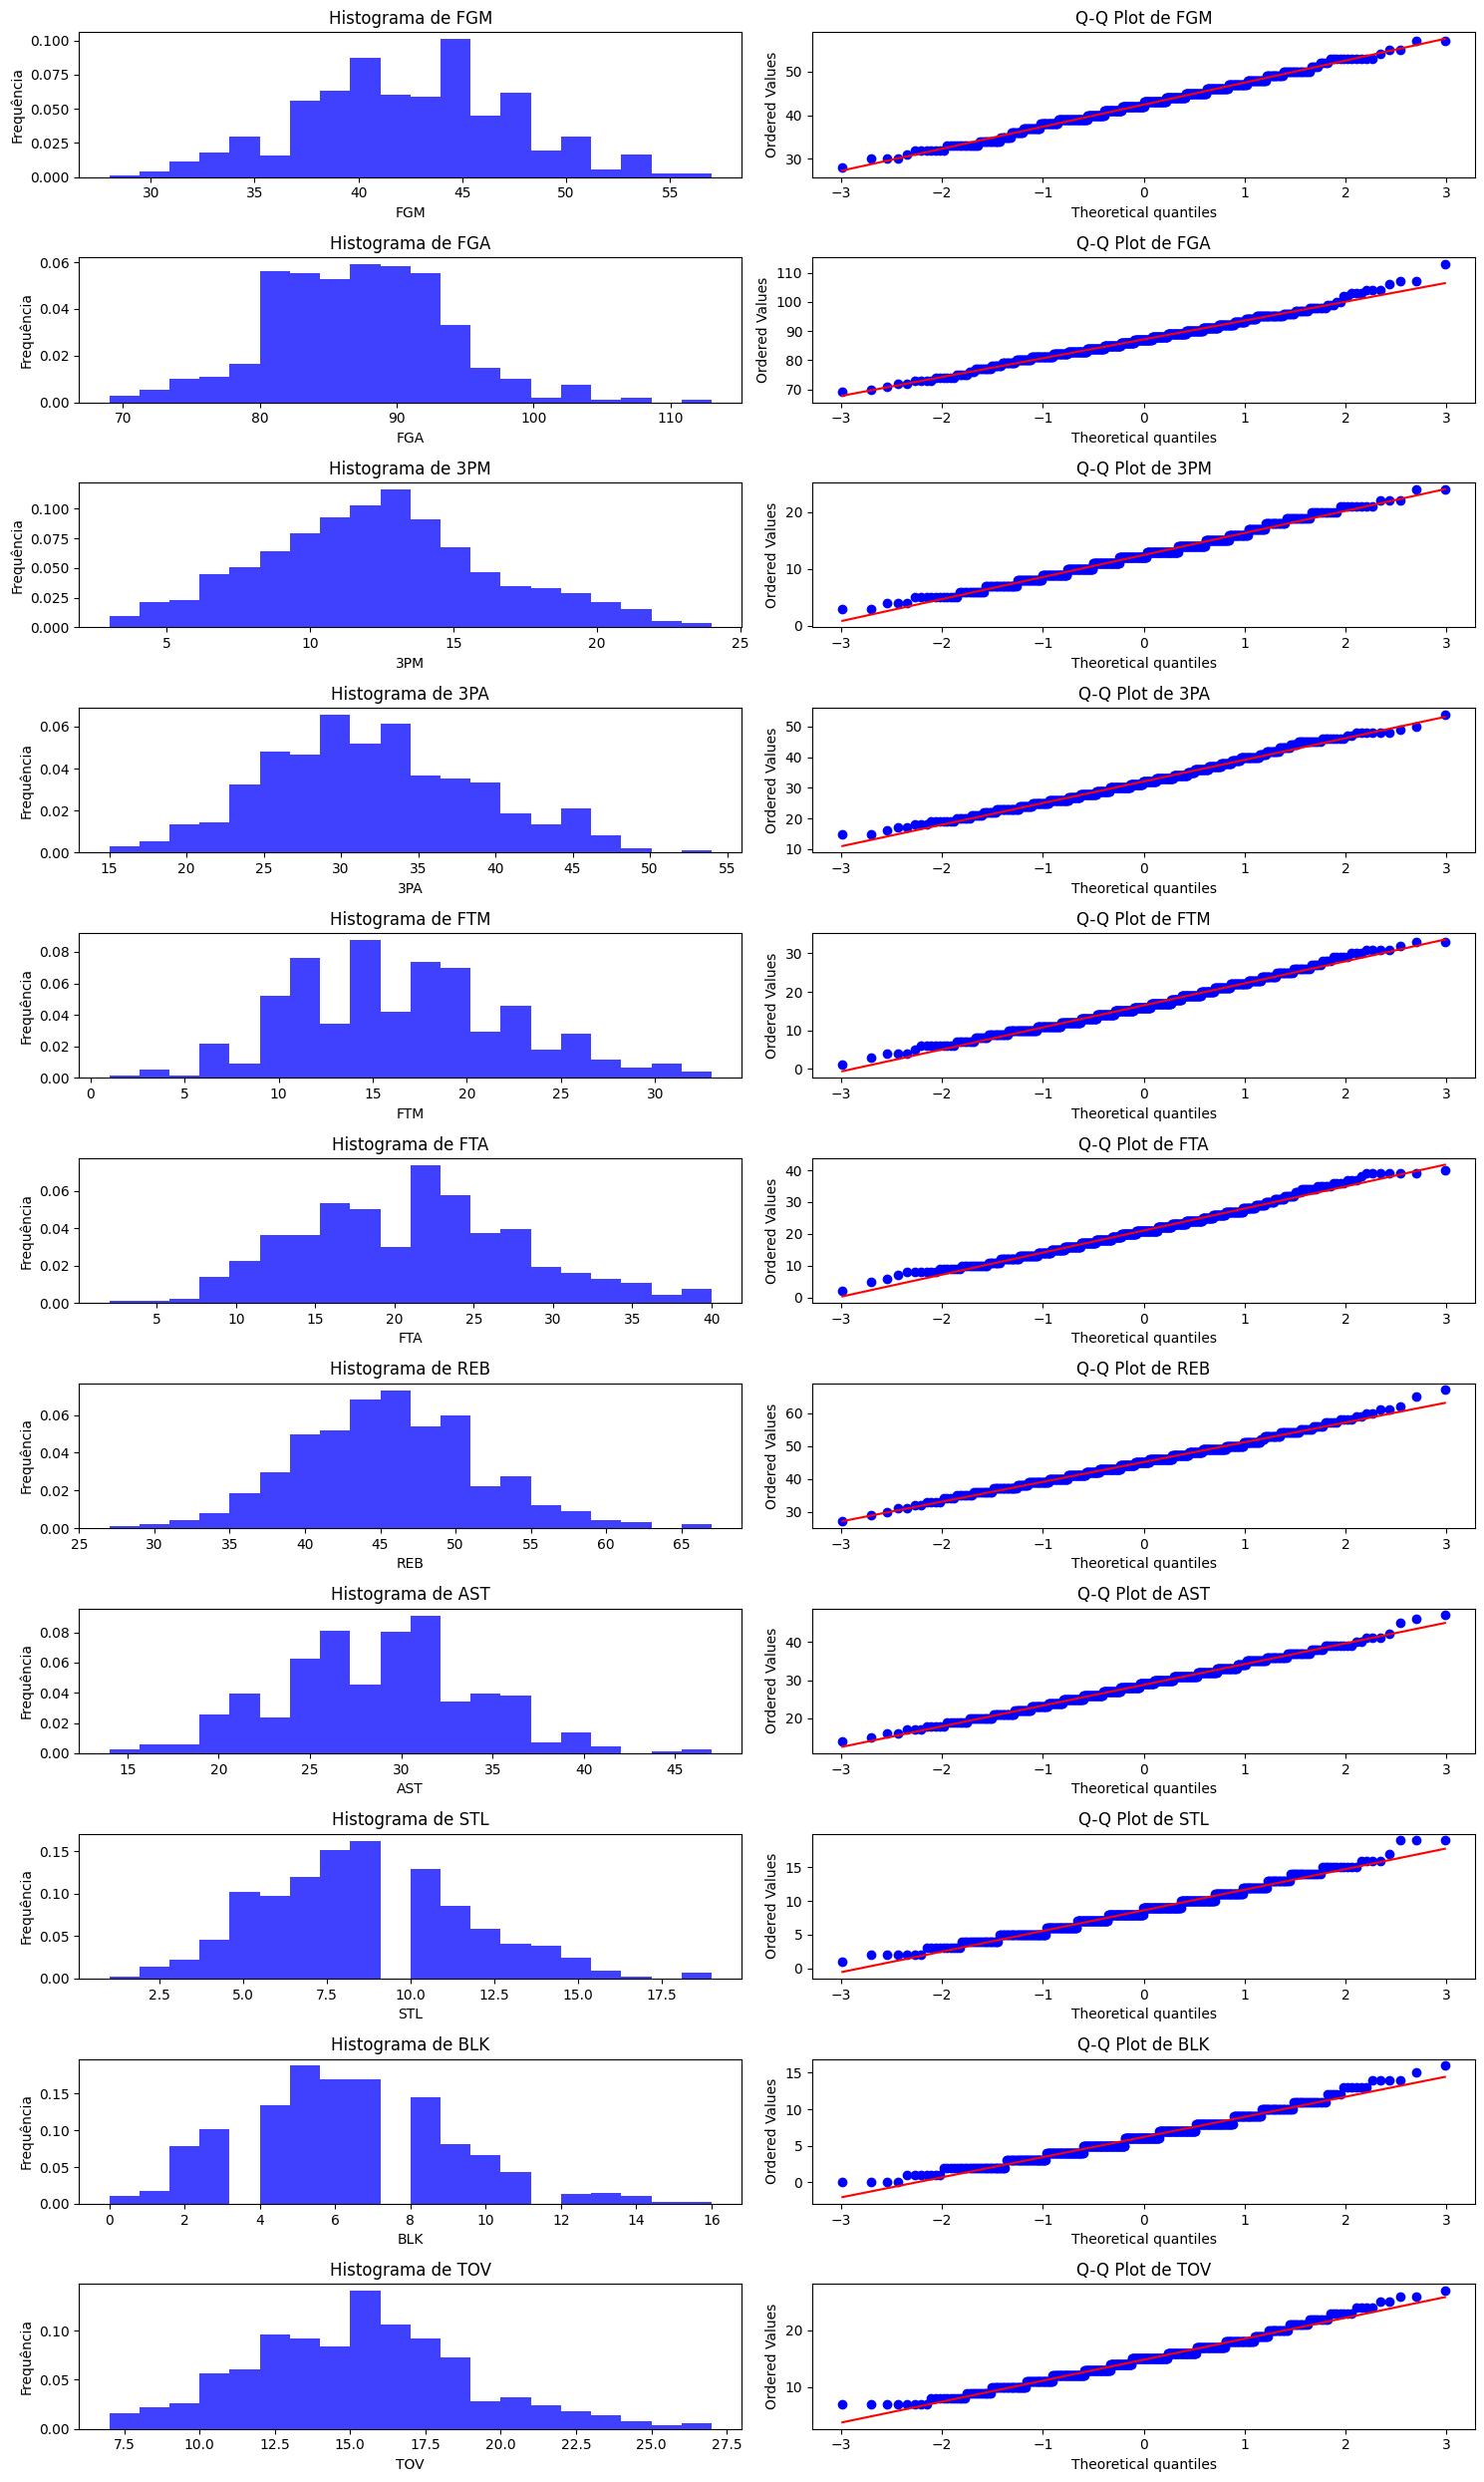

In [23]:
# Estatísticas a serem analisadas
estatisticas = ['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'REB', 'AST', 'STL', 'BLK', 'TOV']

# Configurações para subplot
num_rows = len(estatisticas)
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 25))

# Loop sobre as estatísticas
for i, estatistica in enumerate(estatisticas):
    # Dados da estatística ao longo da temporada
    data = warriors_merged[estatistica]
    
    # Histograma
    axs[i, 0].hist(data, bins=20, density=True, alpha=0.75, color='b')
    axs[i, 0].set_title(f'Histograma de {estatistica}')
    axs[i, 0].set_xlabel(estatistica)
    axs[i, 0].set_ylabel('Frequência')
    
    # Q-Q plot
    stats.probplot(data, dist="norm", plot=axs[i, 1])
    axs[i, 1].set_title(f'Q-Q Plot de {estatistica}')

# Ajustar layout
plt.tight_layout()
plt.show()


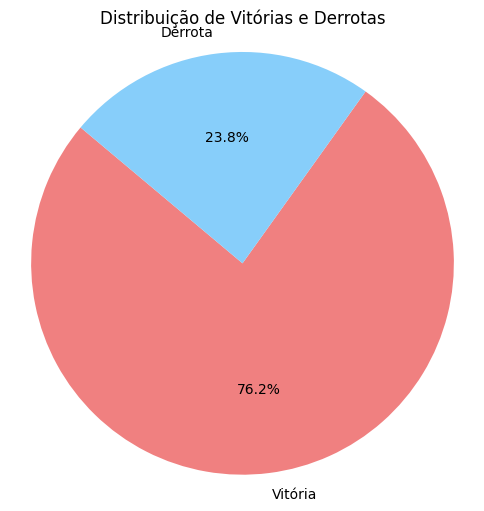

In [24]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_merged['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


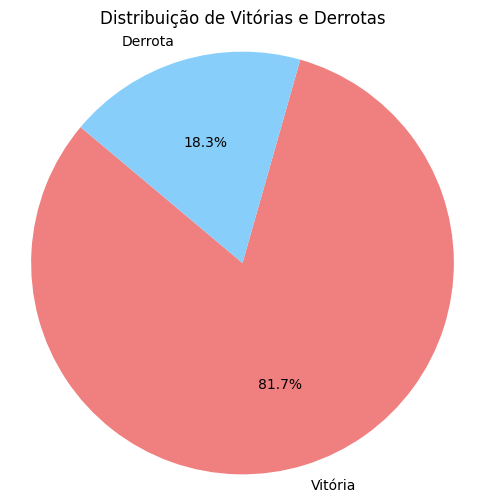

In [25]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_14_15['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


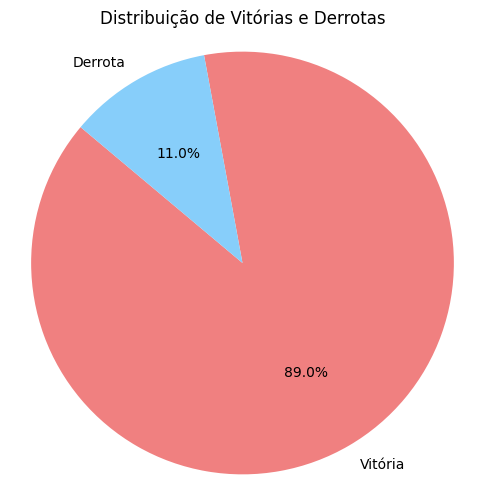

In [26]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_15_16['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


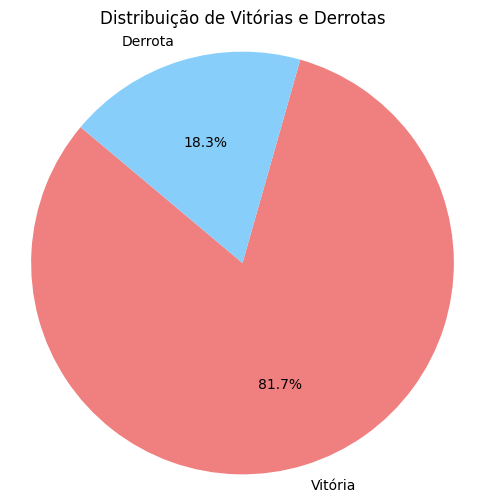

In [27]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_16_17['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


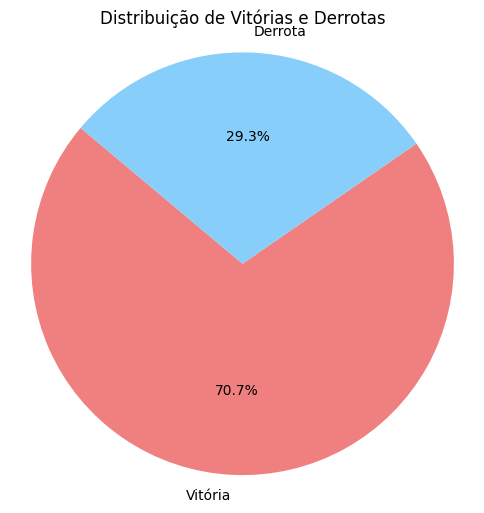

In [28]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_17_18['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


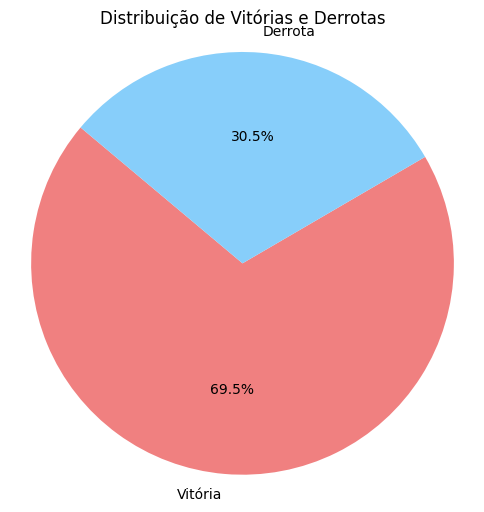

In [29]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_18_19['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


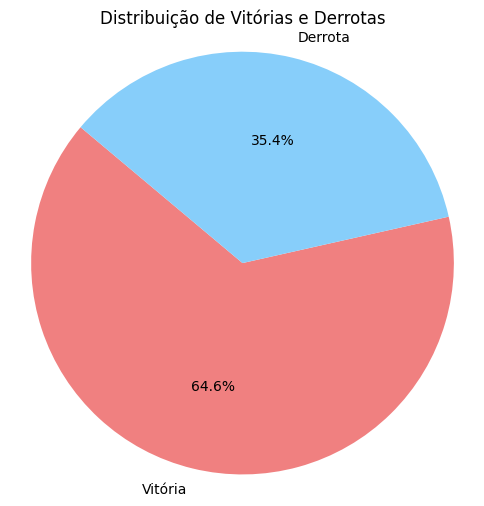

In [30]:
# Calcular a distribuição de vitórias e derrotas
wl_counts = warriors_21_22['W_L'].value_counts()

# Plotar gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(wl_counts, labels=['Vitória', 'Derrota'], autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'], startangle=140)
plt.title('Distribuição de Vitórias e Derrotas')
plt.axis('equal')
plt.show()


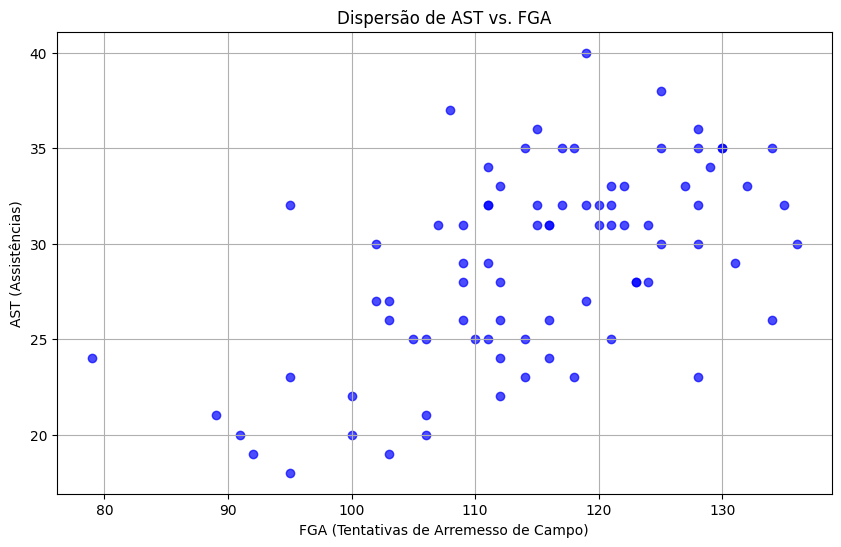

In [34]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(warriors_15_16['PTS'], warriors_15_16['AST'], color='blue', alpha=0.7)
plt.title('Dispersão de AST vs. FGA')
plt.xlabel('FGA (Tentativas de Arremesso de Campo)')
plt.ylabel('AST (Assistências)')
plt.grid(True)
plt.show()
